In [31]:
import pandas as pd #To hand with data 
import numpy as np #To math 
import seaborn as sns #to visualization
import matplotlib.pyplot as plt # to plot the graphs
import matplotlib.gridspec as gridspec # to do the grid of plots
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import time

In [40]:
df_credit = pd.read_csv("creditcard.csv")
#looking the how data looks
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


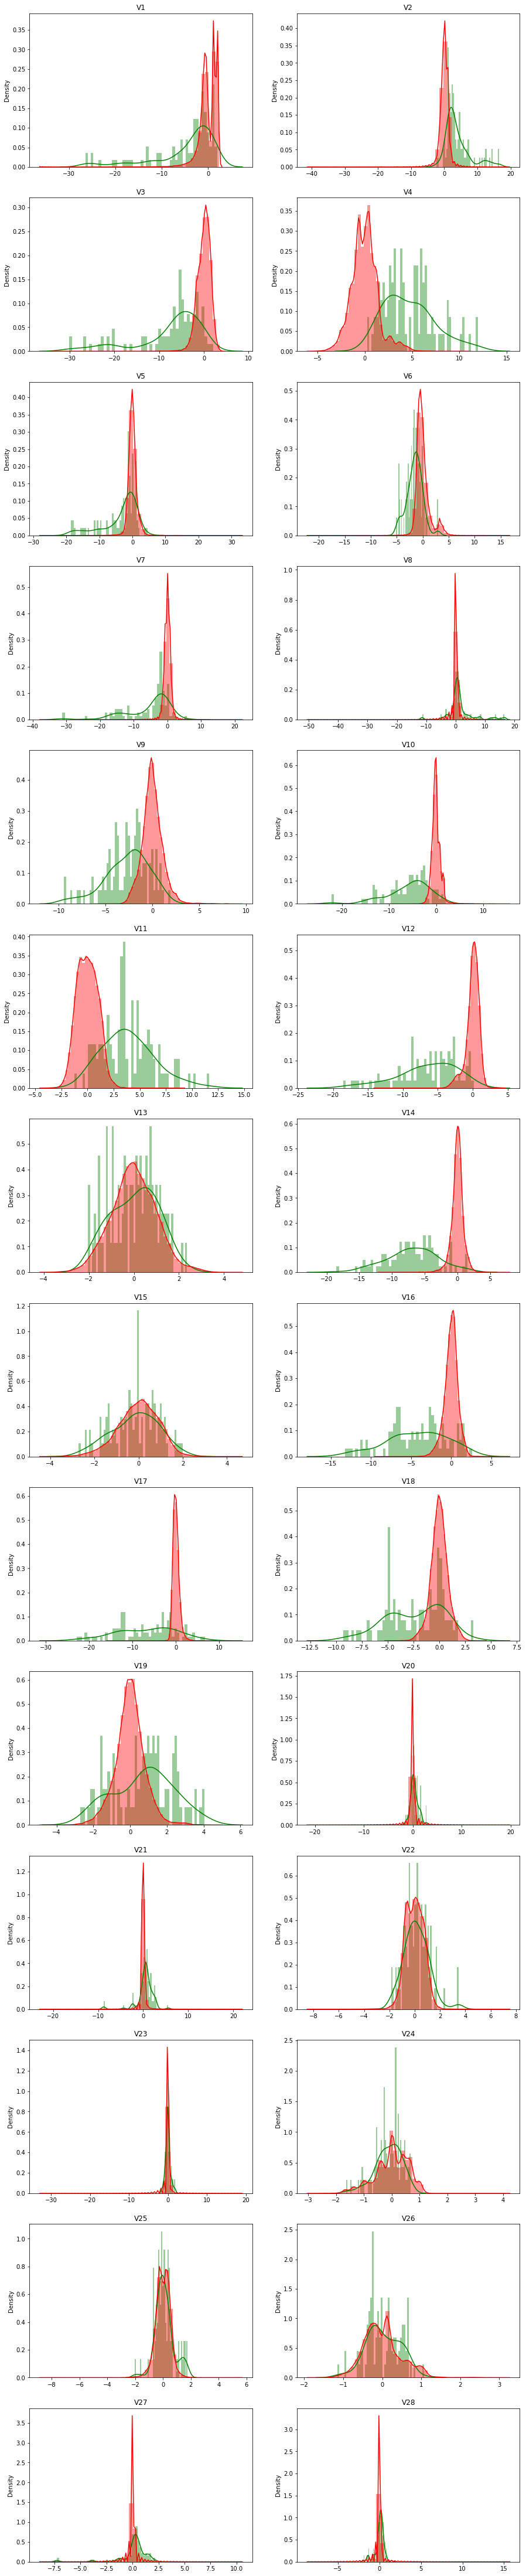

In [53]:
#Looking the V's features
columns = df_credit.iloc[:,1:29].columns

frauds = df_credit.Class == 1
normals = df_credit.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df_credit[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df_credit[col][frauds], bins = 50, color='g') #Will receive the "semi-salmon" violin
    sns.distplot(df_credit[col][normals], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.savefig("variablehist.png")
plt.show()

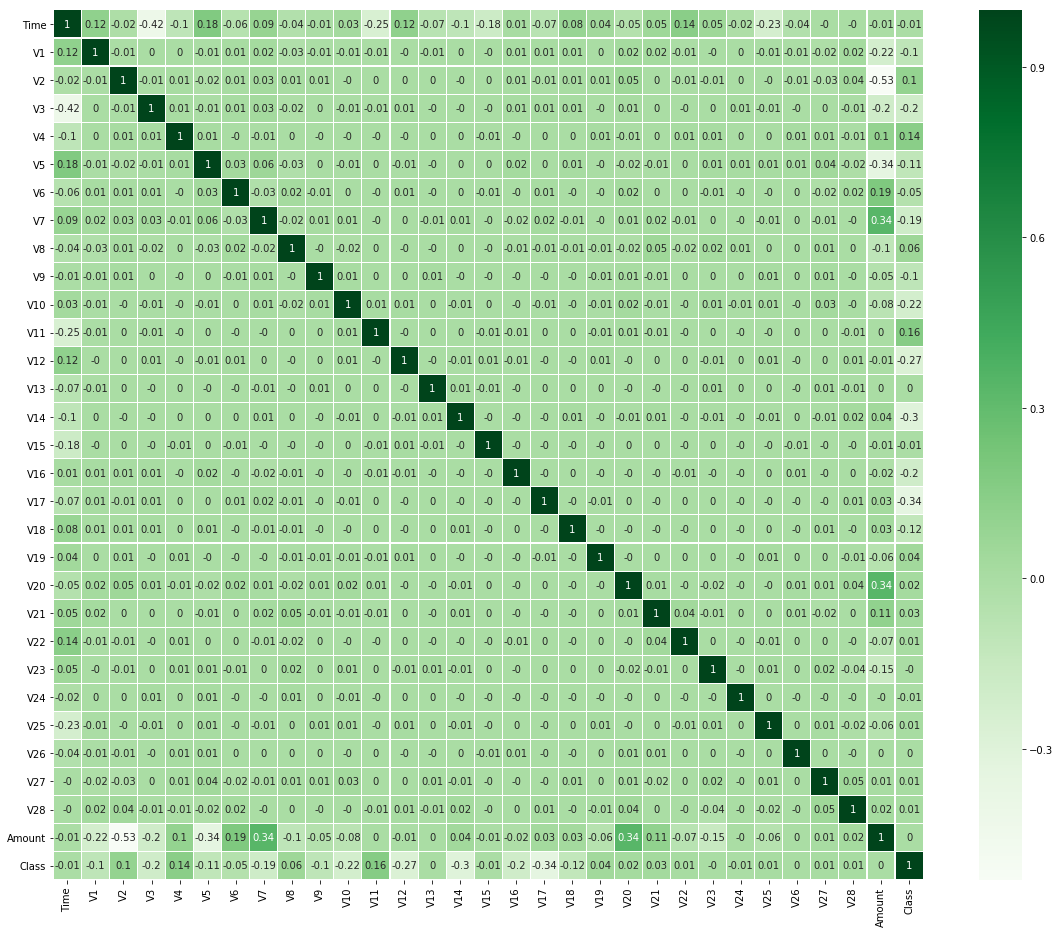

In [54]:
colormap = plt.cm.Greens

plt.figure(figsize=(20,16))

sns.heatmap(round(df_credit.corr(),2),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.savefig("correlationplot.png")
plt.show()

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
df_credit = df_credit.sample(frac=0.2,replace=True, random_state=1212)
X = df_credit.drop(["Class"], axis=1).values #Setting the X to do the split
y = df_credit["Class"].values # transforming the values in array
# the function that we will use to better evaluate the model
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f: {}".format(fbeta_score(true_value, pred, beta=0.5)))
#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_sample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))
# splitting data into training and test set
X_train, X_test_o, y_train, y_test_o = train_test_split(X_smote, y_smote, random_state=2, test_size=0.20)
X_train_o, X_test, y_train_o, y_test = train_test_split(X_smote, y_smote, random_state=2, test_size=0.20)

normal data distribution: Counter({0: 56861, 1: 100})
SMOTE data distribution: Counter({0: 56861, 1: 56861})


In [42]:
#RF
#params of the model
start = time.clock()
param_grid = {"max_depth": [3,5,7],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}
# Creating the classifier
classifier = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, 
                                    random_state=3, criterion='entropy', n_jobs=-1, verbose=1 )
grid_search = GridSearchCV(classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)
end = time.clock()
print('运行时间:',end - start)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  1

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  1

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  1

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   

0.999362476230256
{'max_depth': 7, 'max_features': 5, 'n_estimators': 10}
运行时间: 24.342593999999963


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [43]:
rf = RandomForestClassifier(max_features=grid_search.best_params_['max_features'], 
                               max_depth=grid_search.best_params_['max_depth'] ,
                               n_estimators=grid_search.best_params_['n_estimators'],
                               random_state=43, 
                               criterion='entropy', n_jobs=-1, verbose=1)
rf.fit(X_train, y_train)
rf_pre = rf.predict(X_test)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, rf_pre))
print_results("\nSMOTE + RandomForest classification", y_test, rf_pre)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


Confusion Matrix: 
[[11393     5]
 [   11 11336]]

SMOTE + RandomForest classification
accuracy: 0.9992965486920202
precision: 0.9995591217705669
recall: 0.9990305807702476
f: 0.9994533688349703


In [44]:
#Bagging KNN
start = time.clock()
knn = KNeighborsClassifier()
k_range = list(range(1,10))
weight_options = ['uniform','distance']
algorithm_options = ['auto']
param_gridknn = dict(n_neighbors = k_range,weights = weight_options,algorithm=algorithm_options)
#grid search
grid_search = GridSearchCV(knn,param_gridknn,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)
end = time.clock()
print('运行时间:',end - start)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.7min finished


0.9304989173087703
{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
运行时间: 0.6604610000000548


In [45]:
knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                              weights=grid_search.best_params_['weights'],
                                              algorithm=grid_search.best_params_['algorithm']),
                          max_samples=0.5, max_features=0.5)
knn.fit(X_train, y_train)
knn_pre = knn.predict(X_test)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, knn_pre))
print_results("\nSMOTE + Bagging KNNclassification", y_test, knn_pre)

Confusion Matrix: 
[[11391     7]
 [    3 11344]]

SMOTE + Bagging KNNclassification
accuracy: 0.9995603429325126
precision: 0.9993833142454409
recall: 0.9997356129373403
f: 0.9994537541188702


In [46]:
#logit
start = time.clock()
param_grid = {'C': [0.01, 0.1, 1, 10],
             'penalty':['l1', 'l2']}

logreg = LogisticRegression(random_state=2)

grid_search_lr = GridSearchCV(logreg, param_grid=param_grid, scoring='recall', cv=5,n_jobs=-1)

grid_search_lr.fit(X_train, y_train)
# The best recall obtained
print(grid_search_lr.best_score_)
#Best parameter on trainning set
print(grid_search_lr.best_params_)
end = time.clock()
print('运行时间:',end - start)

0.9933866548573541
{'C': 1, 'penalty': 'l1'}
运行时间: 1.5467690000000403


In [49]:
# Creating the model 
lr = LogisticRegression(C=grid_search_lr.best_params_['C'], penalty=grid_search_lr.best_params_['penalty'])
lr.fit(X_train, y_train)
logit_pre = lr.predict(X_test)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, logit_pre))
print_results("\nSMOTE + LogisticRegression", y_test, logit_pre)

Confusion Matrix: 
[[11340    58]
 [   70 11277]]

SMOTE + LogisticRegression
accuracy: 0.9943723895361618
precision: 0.9948831054256727
recall: 0.9938309685379395
f: 0.9946724998676946


In [50]:
#GBDT
start = time.clock()
parameters = {'loss': ['deviance', 'exponential'], 
              'learning_rate': [0.05,0.1,0.2],
             'n_estimators':[100],
             'max_depth':[3,5,7,10]}
classifier=GradientBoostingClassifier()
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
print("The best accuracy using gridSearch is", best_accuracy)

best_parameters = grid_search.best_params_
print("The best parameters for using this model is", best_parameters)
end = time.clock()
print('运行时间:',end - start)

The best accuracy using gridSearch is 0.9998241313738637
The best parameters for using this model is {'learning_rate': 0.2, 'loss': 'exponential', 'max_depth': 7, 'n_estimators': 100}
运行时间: 73.37023899999997


In [51]:
# Creating the model 
gbdt = GradientBoostingClassifier(loss=grid_search.best_params_['loss'],
                                  learning_rate=grid_search.best_params_['learning_rate'],
                                  n_estimators=grid_search.best_params_['n_estimators'],
                                  max_depth=grid_search.best_params_['max_depth'])
gbdt.fit(X_train, y_train)
gbdt_pre = gbdt.predict(X_test)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, gbdt_pre))
print_results("\nSMOTE + GBDT", y_test, gbdt_pre)

Confusion Matrix: 
[[11396     2]
 [    0 11347]]

SMOTE + GBDT
accuracy: 0.9999120685865025
precision: 0.9998237730196493
recall: 1.0
f: 0.9998590134465926


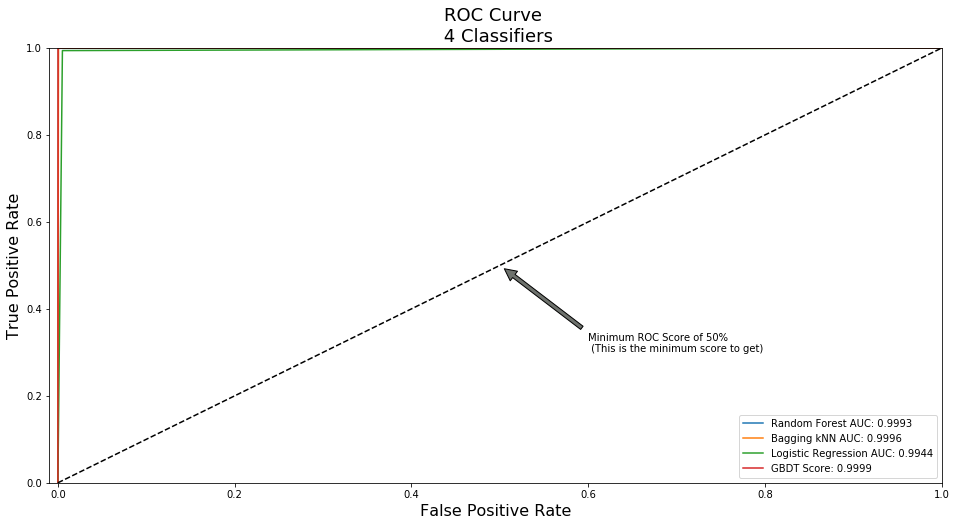

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#ROC
rf_fpr, rf_tpr, rf_thresold = roc_curve(y_test, rf_pre)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test, knn_pre)
logit_fpr, logit_tpr, logit_threshold = roc_curve(y_test, logit_pre)
gbdt_fpr, gbdt_tpr, gbdt_threshold = roc_curve(y_test, gbdt_pre)


def graph_roc_curve_multiple(rf_fpr, rf_tpr, knn_fpr, knn_tpr, logit_fpr, logit_tpr, gbdt_fpr, gbdt_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n 4 Classifiers', fontsize=18)
    plt.plot(rf_fpr, rf_tpr, label='Random Forest AUC: {:.4f}'.format(roc_auc_score(y_test, rf_pre)))
    plt.plot(knn_fpr, knn_tpr, label='Bagging kNN AUC: {:.4f}'.format(roc_auc_score(y_test, knn_pre)))
    plt.plot(logit_fpr, logit_tpr, label='Logistic Regression AUC: {:.4f}'.format(roc_auc_score(y_test, logit_pre)))
    plt.plot(gbdt_fpr, gbdt_tpr, label='GBDT Score: {:.4f}'.format(roc_auc_score(y_test, gbdt_pre)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rf_fpr, rf_tpr, knn_fpr, knn_tpr, logit_fpr, logit_tpr, gbdt_fpr, gbdt_tpr)
plt.savefig("ROC.png")
plt.show()

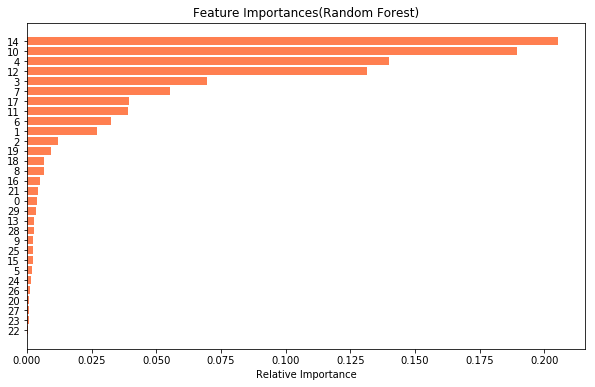

In [78]:
X_train = pd.DataFrame(X_train)
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10,6))
plt.title('Feature Importances(Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='coral', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig("RFimp.png")
plt.show()

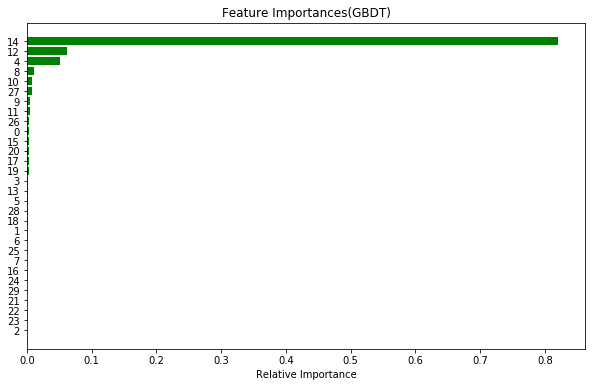

In [73]:
X_train = pd.DataFrame(X_train)
features = X_train.columns
importances = gbdt.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10,6))
plt.title('Feature Importances(GBDT)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig("GBDTimp.png")
plt.show()